In [2]:
# # Cloning the required files from git directly to avoid pain
# !git clone https://github.com/ahmedtarek-/Deep-Q-Learning.git
# !cp -r Deep-Q-Learning/* .
# !ls

In [3]:
# # Install required packages
# !pip install -q gym==0.15.4
# !pip install -q pycolab==1.2
# !pip install -q torch==1.2.0
# # !pip install -q matplotlib==3.1.2

In [1]:
# Adding /training to sys path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../training/')

## A) Simulating the `main.py` file

### 1. Imports and load config

In [4]:
%load_ext autoreload
%autoreload 2

import yaml
from trainer import Trainer
from result import Result

import gym
import gym_grid

from torch.nn import SmoothL1Loss

with open('../training/config_2d_grid.yaml') as f:
  config = yaml.safe_load(f)['training_config']

# with open('../training/config.yaml') as f:
#   config = yaml.safe_load(f)['training_config']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
config

{'learning_rate': 0.001,
 'exp_replay': True,
 'env_name': 'DeadlyGrid-v0',
 'eval_steps': 40,
 'evaluate_at': 1000,
 'num_episodes': 100,
 'debug': True,
 'num_update_steps': 100000,
 'gamma': 0.99}

### 2. Trainer and the loop

In [6]:
trainer = Trainer(env_name=config["env_name"])

# 4. Run a training loop
training_rewards, training_discounted_rewards = trainer.the_loop(**config)

Gamma is 0.99
Do we use experience replay? True
We use experience replay buffer with buffer size 128
Intermediate reward at idx 0 update is 100
Discounted reward at idx 0 update is 97.0299

======= Debug =========
num_update_steps:  100000
counter:  0
evaluate_at:  1000
======= End Debug =========


/home/galan/anaconda3/envs/rl/lib/python3.8/site-packages/pycolab/ascii_art.py:318: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  art = np.vstack(np.fromstring(line, dtype=np.uint8) for line in art)


Intermediate reward at idx 1 update is 0
Discounted reward at idx 1 update is 0.0

======= Debug =========
num_update_steps:  100000
counter:  1000
evaluate_at:  1000
======= End Debug =========
Intermediate reward at idx 2 update is 0
Discounted reward at idx 2 update is 0.0

======= Debug =========
num_update_steps:  100000
counter:  2000
evaluate_at:  1000
======= End Debug =========
Intermediate reward at idx 3 update is 0
Discounted reward at idx 3 update is 0.0

======= Debug =========
num_update_steps:  100000
counter:  3000
evaluate_at:  1000
======= End Debug =========
Intermediate reward at idx 4 update is 100
Discounted reward at idx 4 update is 97.0299

======= Debug =========
num_update_steps:  100000
counter:  4000
evaluate_at:  1000
======= End Debug =========
Intermediate reward at idx 5 update is 100
Discounted reward at idx 5 update is 99.0

======= Debug =========
num_update_steps:  100000
counter:  5000
evaluate_at:  1000
======= End Debug =========
Intermediate rew

#### Huber loss regime

In [ ]:
huber_loss = SmoothL1Loss()

trainer = Trainer(env_name=config["env_name"], loss_function = huber_loss)

# 4. Run a training loop
training_rewards, training_discounted_rewards = trainer.the_loop(**config)

### 3. Calling Result

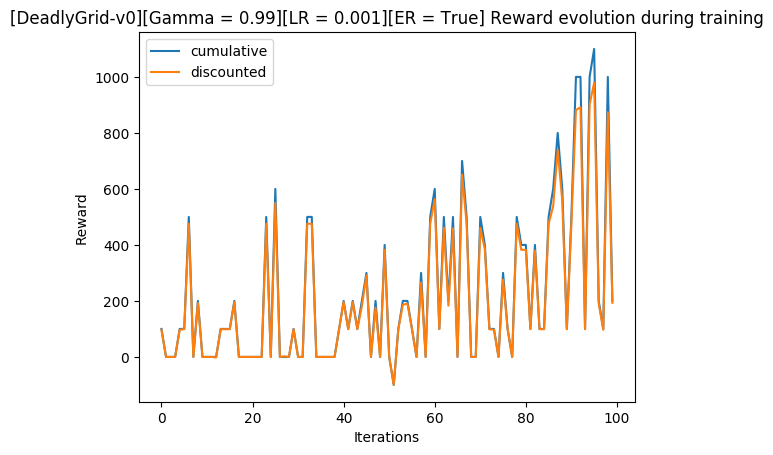

In [7]:
Result(
  model=trainer.model,
  rewards=training_rewards,
  disc_rewards=training_discounted_rewards,
  config=config).save(plot=True)

In [8]:
config

{'learning_rate': 0.001,
 'exp_replay': True,
 'env_name': 'DeadlyGrid-v0',
 'eval_steps': 40,
 'evaluate_at': 1000,
 'num_episodes': 100,
 'debug': True,
 'num_update_steps': 100000,
 'gamma': 0.99}

### 4. Running our simulation

#### 4.1 Method to load env

In [8]:
import torch
import numpy as np
from mlp import MLP

import matplotlib.pyplot as plt
from IPython import display

def load_model_env(env, path_to_model):
    states = np.prod(env.observation_space.shape)
    actions = env.action_space.n

    m_load = MLP(states, actions)
    m_load.load_state_dict(torch.load(path_to_model))

    return m_load

#### 4.2 Method to visualise

In [9]:
def run_trained_model_visual(env, model, num_steps = 20):
    current_state, obs_to_render = env.reset_with_render()
    env.render(obs_to_render)
    rew_total = 0

    # put the model in inference mode
    model.eval()
    done = False

    for _ in range(num_steps):
        action = torch.argmax(model(torch.Tensor(current_state.flatten()))).item()
        current_state, rew , done, _, obs_to_render = env.step_with_render(action)
        env.render(obs_to_render)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        rew_total += rew

        if done:
            break

    print(f"The total reward in this episode is: {rew_total}")

#### 4.3 Testing the mf

The total reward in this episode is: 10000


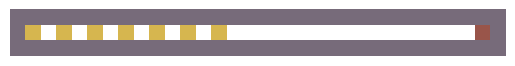

In [15]:
env_linear = gym.make("LinearTrack-v0")
model = load_model_env(env_linear, "../results/models/1d_track/28_07_2023-18:04_model_n_e_r_20K_fixed_99.pt")

run_trained_model_visual(env_linear, model, num_steps = 20)

The total reward in this episode is: 800


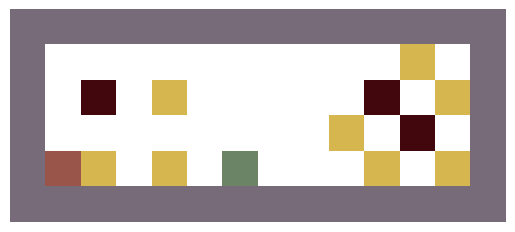

In [41]:
env_2d = gym.make("DeadlyGrid-v0")
model = load_model_env(env_2d, "../results/models/2d_track/28_07_2023-17:07_model.pt")

run_trained_model_visual(env_2d, model, num_steps = 40)

In [42]:
config

{'learning_rate': 0.001,
 'exp_replay': False,
 'env_name': 'DeadlyGrid-v0',
 'eval_steps': 40,
 'evaluate_at': 1000,
 'num_episodes': 100,
 'debug': True,
 'num_update_steps': 500000,
 'gamma': 0.99}

/home/galan/anaconda3/envs/rl/lib/python3.8/site-packages/pycolab/ascii_art.py:318: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  art = np.vstack(np.fromstring(line, dtype=np.uint8) for line in art)


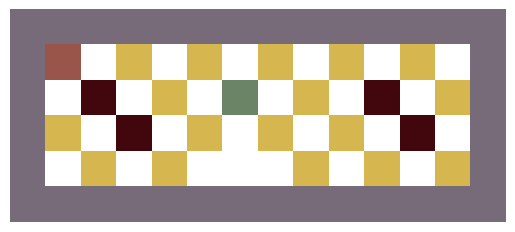

In [20]:
current_state, obs_to_render = env_2d.reset_with_render()
env_2d.render(obs_to_render)